In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.shape

(8693, 14)

In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


* все столбцы, кроме PassengerId имеют пропуски
* в полях HomePlanet, CryoSleep, Destination, VIP достаточно мало уникальных значений, значит их можно будет заменить числами

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Наглядно видим, что во всех столбцах пропущены значения, при этом пропущенных достаточно мало. Значит можем заполнить все столбцы без их удаления

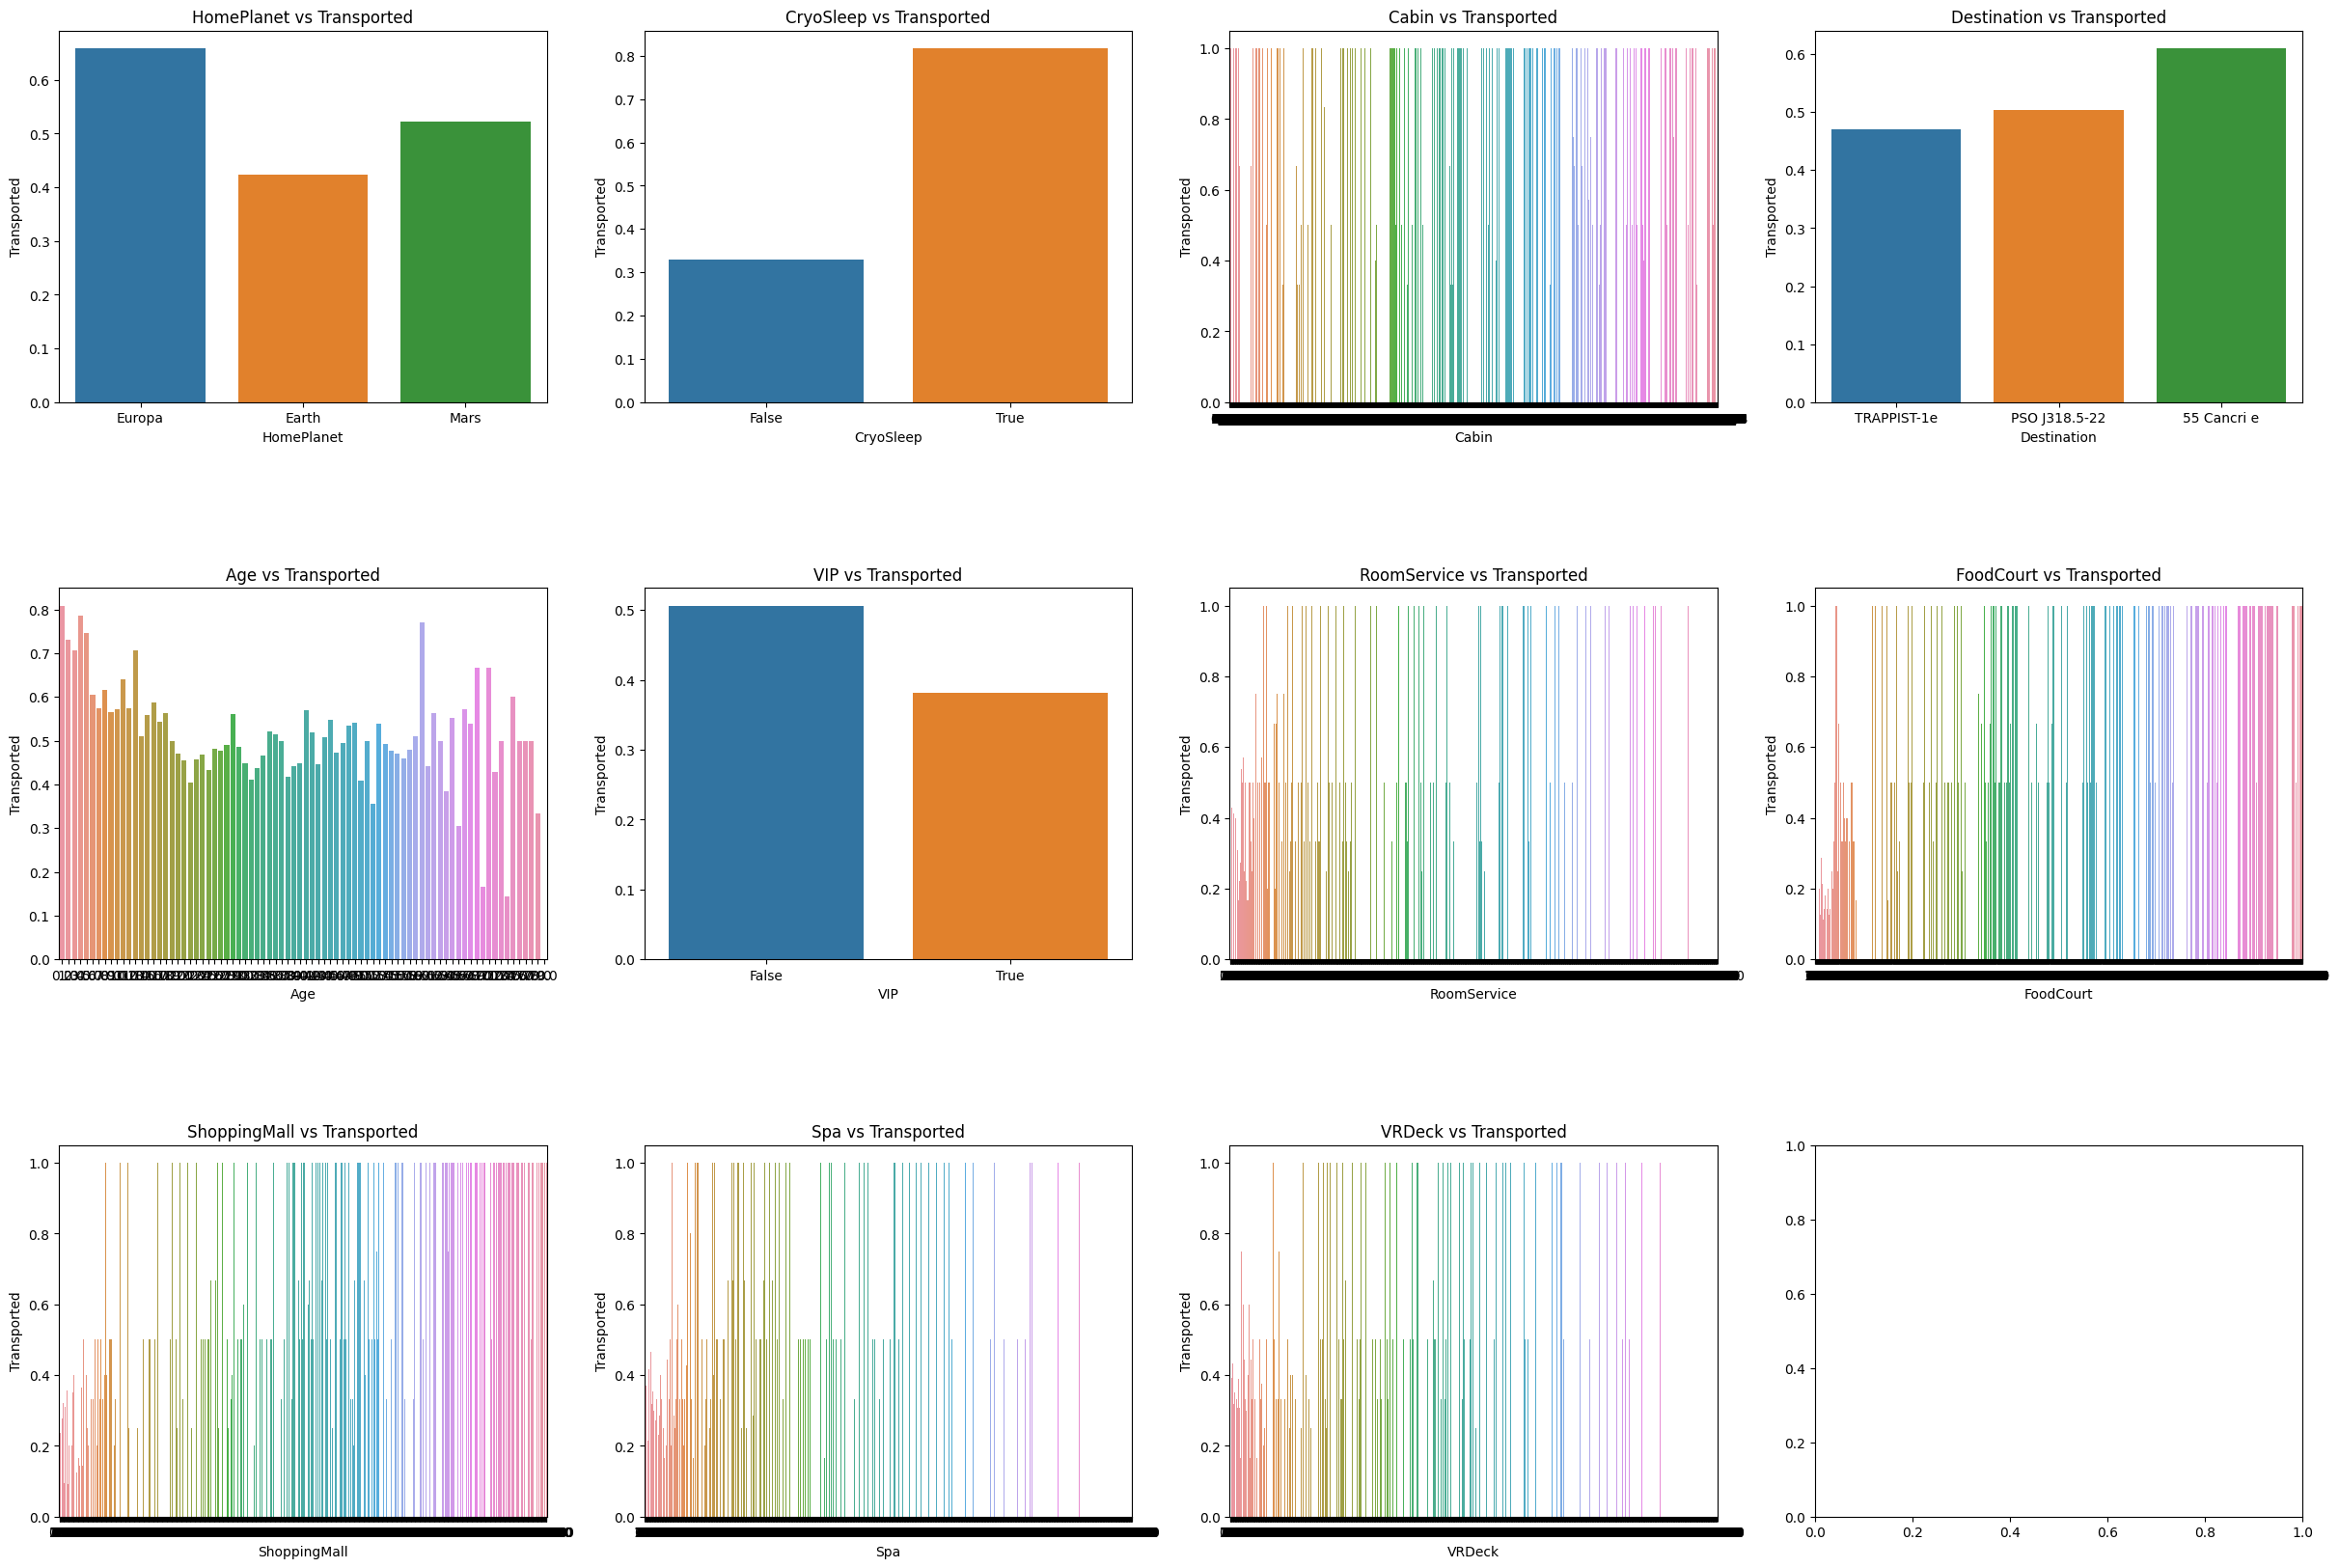

In [8]:
columns_to_plot = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(3, 4, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    sns.barplot(
        x=train[column],  
        y=train['Transported'],  
        ax=ax,
        errorbar=None
    )
    ax.set_xlabel(column)
    ax.set_ylabel('Transported')  
    ax.set_title(f'{column} vs Transported')

plt.show()

<Figure size 1500x600 with 0 Axes>

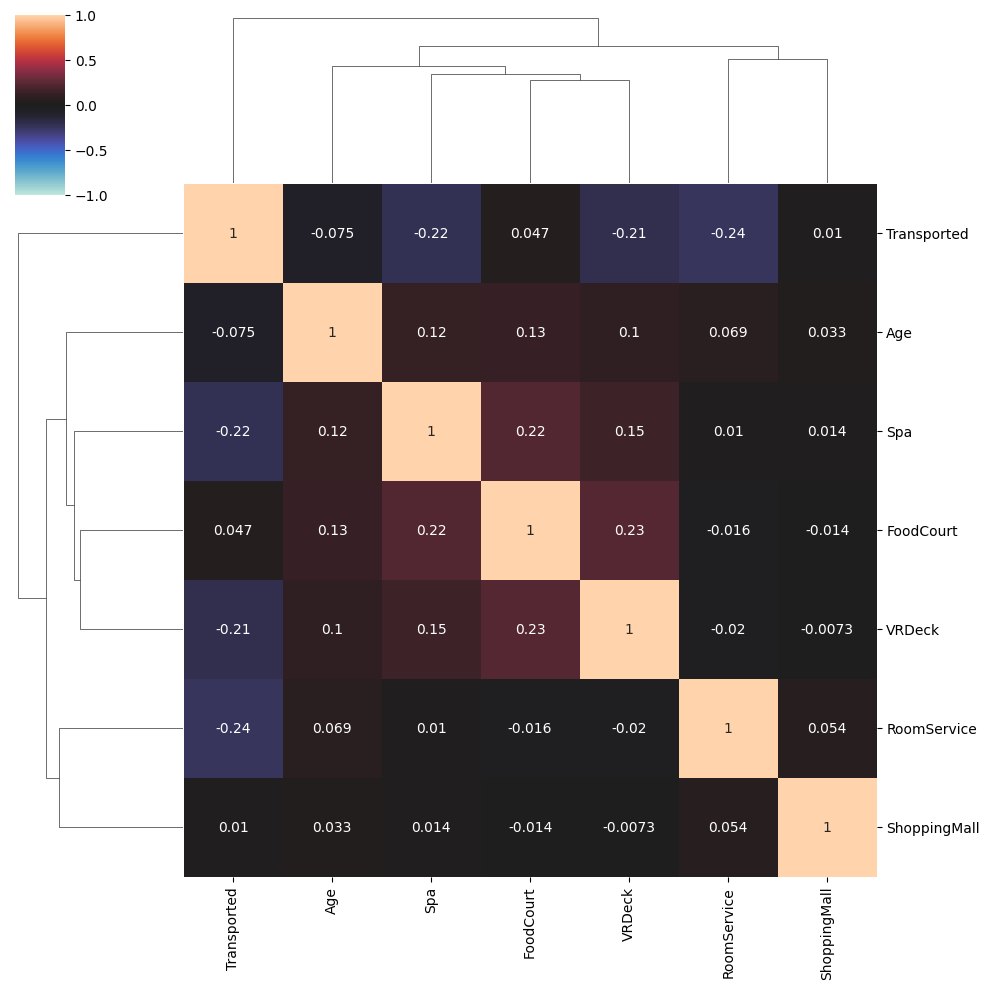

In [9]:
plt.figure(figsize=(15,6))
sns.clustermap(train.select_dtypes(exclude=['object']).corr("pearson"), vmin=-1.0, vmax=1.0, cmap="icefire", method="complete", annot=True)

Пока что никак заметных корреляций нет, кроме FoodCourt и Spa. Однако нужно обработать другие столбцы и посмотреть корреляции с ними.

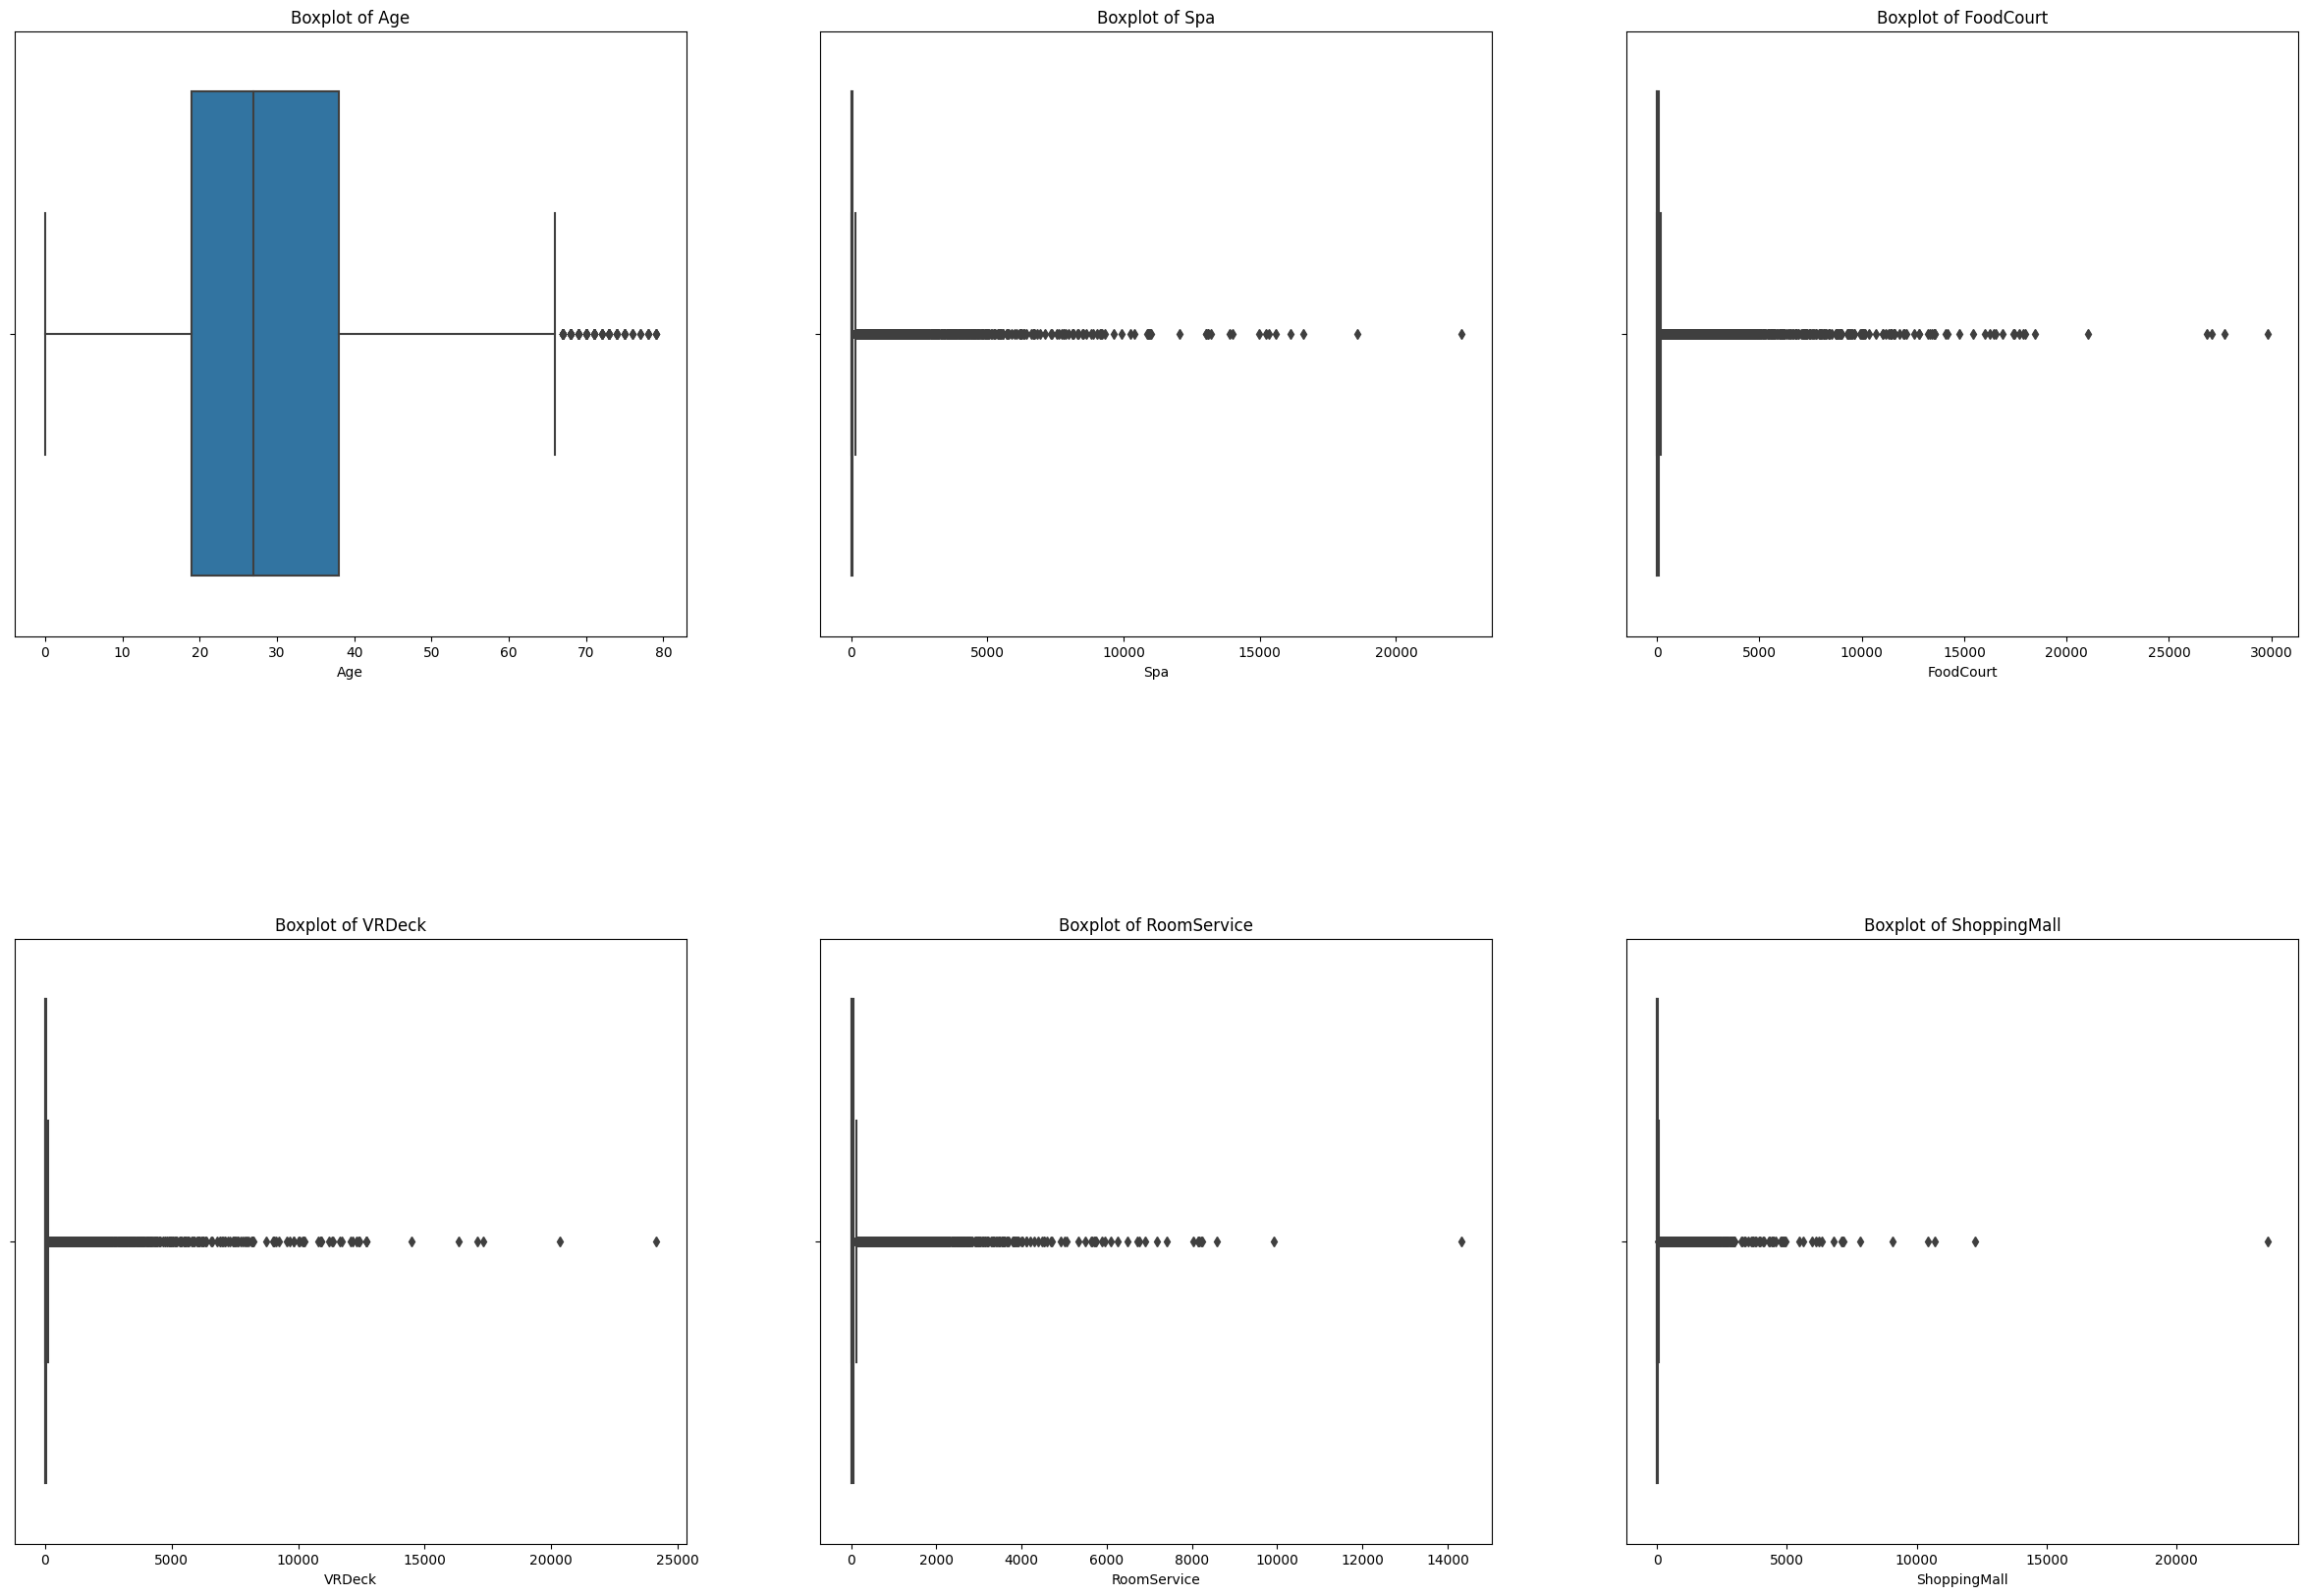

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(train[['Age', 'Spa', 'FoodCourt', 'VRDeck', 'RoomService', 'ShoppingMall']]):
    ax = axes[i // 3, i % 3]
    sns.boxplot(
        x=train[column],  
        ax=ax,
    )
    ax.set_xlabel(column)
    ax.set_title(f'Boxplot of {column}')

plt.show()

Видим достаточно много выбросов, которые можно убрать либо удалением, либо разбиением на интервалы